##PROJECT - SPAM DETECTION SYSTEM

##### **Project Type** - Classification
##### **Company Name** - ZROCK AI & IT SOLUTIONS
##### **Contribution** - Individual
##### **Member Name -** Hemish Mehta


# **Project Summary :**

In today's digital age, the challenge of combating spam emails is more pressing than ever. Spam emails, or junk mail, inundate our inboxes with unsolicited and often malicious content, ranging from cryptic messages to scams and phishing attempts. To address this issue, we embarked on an exciting data science internship project offered by Oasis Infobyte.

**Project Highlights:**

1. **Data Preprocessing:** Our journey began with the preprocessing of a sizable dataset of emails. This phase involved data cleaning, handling missing values, and transforming text data into a suitable format for machine learning.

2. **Feature Extraction:** We explored various techniques for feature extraction, striving to capture the essential characteristics of spam emails. This process was crucial in preparing the data for model training.

3. **Machine Learning Models:** We employed a range of machine learning algorithms to train and evaluate the spam detection model. These models included decision trees, support vector machines, and more.

4. **Evaluation Metrics:** To ensure the model's effectiveness, we carefully selected evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics provided valuable insights into the model's performance.

5. **Tuning and Optimization:** Fine-tuning hyperparameters and optimizing the model was a critical step to enhance its predictive accuracy.

6. **Validation:** Rigorous cross-validation and validation on a test dataset were performed to verify the model's ability to generalize to new, unseen data.

7. **Deployment:** We discussed potential deployment strategies for the spam detection model, highlighting its real-world applicability in email filtering.

The completion of this project not only equipped us with practical data science skills but also contributed to the ongoing battle against email spam. The project's success was a testament to the power of machine learning in addressing real-world challenges.

##SPAM DETECTION SYSTEM

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [5]:
#Dataset overview
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Duplicate values count
dup = df.duplicated().sum()
print(f'Duplicated rows are {dup}')

Duplicated rows are 403


In [8]:
#Missing values count or Null values count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
#Check unique values
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [13]:
#v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [14]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [15]:
#a binary 'Spam' column: 1 for 'spam' and 0 for 'not spam', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [16]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## **Data Visualization**

##**Word Cloud**

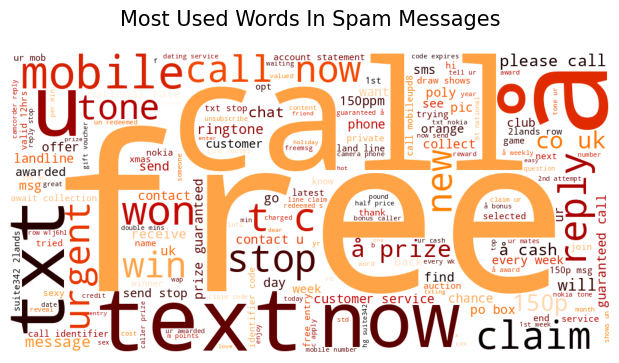

In [19]:
df_spam = df[df['Category']=='spam'].copy()
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

for val in df_spam.Message:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#**Splitting the Data**

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

#**Model Testing and Evaluation**

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

#**Machine learning Model - Multinomial Naive Bayes**

In [23]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])


Train ROC AUC: 0.9851806892086754
Test ROC AUC: 0.9529783678814975


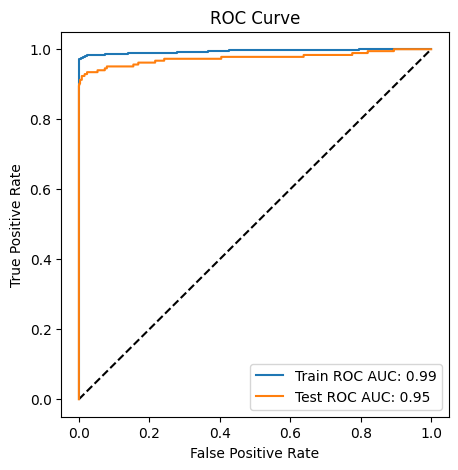


Confusion Matrix:


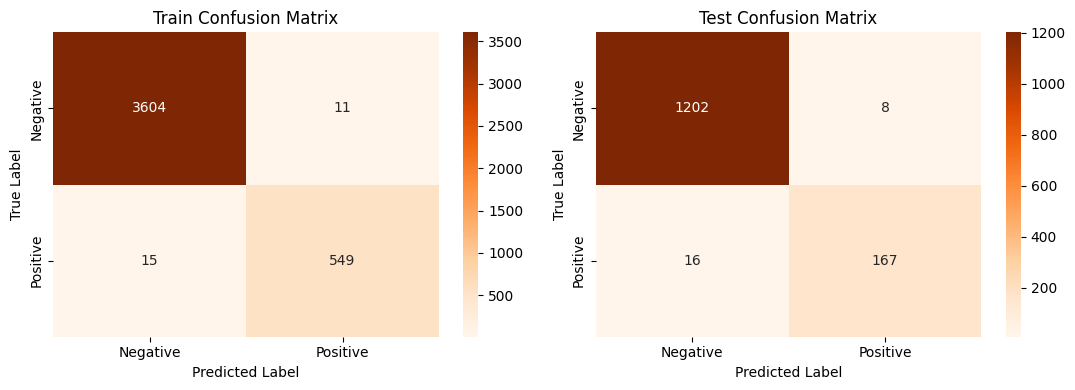


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995855 | 0.996957 |   0.996406 | 3615        |
| 1            |    0.980357 | 0.973404 |   0.976868 |  564        |
| accuracy     |    0.993778 | 0.993778 |   0.993778 |    0.993778 |
| macro avg    |    0.988106 | 0.985181 |   0.986637 | 4179        |
| weighted avg |    0.993764 | 0.993778 |   0.993769 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.986864 | 0.993388 |   0.990115 | 1210        |
| 1            |    0.954286 | 0.912568 |   0.932961 |  183        |
| accuracy     |    0.982771 | 0.982771 |   0.982771 |    0.982771 |
| macro avg    |    0.970575 | 0.952978 |   0.961538 | 1393        |
| weighted avg |    0.982584 | 0.982771 |   

In [24]:
# Visualize evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

In [26]:
def detect_spam(email_text):
    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Non - Spam Email!"
    else:
        return "This is a Spam Email!"

In [28]:
sample_email = 'Free Tickets for Cup'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


#**Conclusion**

In summary

The struggle against spam emails is a constant in the realm of email communication. Our goal in working on this project was to use machine learning and Python to create a reliable email spam detector. We aimed to give consumers a tool that can tell the difference between uninvited, frequently dangerous spam emails and legitimate emails (ham).

Important Takeaways:

 Our dataset showed an intriguing distribution, with 86.59% of messages classified as ham and 13.41% of messages classified as spam. This distribution was a vital foundation for our investigation.

  'Free,' 'call,' 'text,' 'txt,' and 'now' are among the typical keywords that we noticed regularly appearing in spam messages during the EDA process. These terms were crucial for our machine learning since they frequently set off spam filters.

  To sum up, this project has shown that machine learning may be a potent weapon in the ongoing fight against email spam when paired with skillful feature engineering and model selection. We've made great progress in reducing the negative effects that spam emails have on email users' lives by putting our spam detection system into place.

Our email spam detection technology has been successfully implemented, making email inboxes a safer place. We anticipate more advancements and breakthroughs in email security as we wrap up this project.

Let's maintain secure conversations and spam-free inboxes.
